# 2 필요한 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 3 데이터셋 로드

In [6]:
df = pd.read_csv('data/diabetes_feature.csv')
df.shape 


(768, 16)

In [7]:
# 데이터셋 미리보기
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 4 학습과 예측에 사용할 데이터셋 만들기

In [11]:
# X : feature  y : label값
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [13]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age',  'Pregnancies_high',
        'Insulin_nan',
       'low_glu_insulin']]
X.shape

(768, 9)

In [14]:
y=df['Outcome']
y.shape

(768,)

In [15]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split으로 만든다.

from sklearn.model_selection import train_test_split

# train_test_split?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
# train 세트의 문제와 정답의 데이터 수를 확인

X_train
# random_state=42 를 지우면 매번 랜덤이 되어서 똑같은 자료를 불러올 수 없으므로 지정

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,169.5,False
435,141,0,0,42.4,0.205,29,False,169.5,False


In [17]:

X_train.shape, y_train.shape

((614, 9), (614,))

In [18]:
# test 세트의 문제와 정답의 데이터 수 확인
X_test.shape, y_test.shape

((154, 9), (154,))

# 6 grid search 


In [99]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid={'max_depth': range(3,12), 
            'max_features' : [0.3, 0.5, 0.7,0.9,1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5,verbose=2)

# -1은 모든걸 다 사용한다는 의미
# cv -> cross variation ->5등분
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [100]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [101]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [102]:
clf.best_score_

0.8664934026389444

In [103]:
# pd.DataFrame(clf.cv_results_)
# 보기 힘들어서 dataframe으로 표로 만들어 준다.
# cross valuation 값 변환
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()
# sort

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.005747,0.000946,0.003426,0.000884,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.006958,0.000926,0.004202,0.000718,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.009589,0.002821,0.004864,0.001483,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.009662,0.003231,0.006212,0.003646,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.011679,0.003454,0.006877,0.002920,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [104]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [105]:
clf.score(X_test, y_test)

0.8701298701298701

# 6.dkfdkfjdk

In [106]:
model

DecisionTreeClassifier(random_state=42)

In [107]:
## 범위 안에 있는 값을 랜덤하게
max_depth = np.random.randint(1,20,10)
max_depth
## 10 개의 리스트 랜덤

array([ 6, 18, 16,  6,  8,  6, 12, 16,  7,  5])

In [108]:
max_features = np.random.uniform(0.4, 1.0, 100)
max_features

array([0.86551256, 0.53290492, 0.47626637, 0.73401178, 0.67865979,
       0.83015354, 0.42962614, 0.77432877, 0.9995936 , 0.90152287,
       0.63452484, 0.78429146, 0.68199735, 0.75060347, 0.75847633,
       0.62780792, 0.75718173, 0.97762594, 0.46504946, 0.95556318,
       0.86358755, 0.59178421, 0.67838085, 0.43279364, 0.93853633,
       0.69033785, 0.77078133, 0.42729375, 0.60792002, 0.73580113,
       0.77479996, 0.810638  , 0.59365432, 0.9964975 , 0.9230904 ,
       0.77301469, 0.5721081 , 0.86678472, 0.66567804, 0.64935017,
       0.95789824, 0.51970444, 0.71077135, 0.92342805, 0.53914988,
       0.98398034, 0.54684657, 0.87618021, 0.82589973, 0.63251159,
       0.82964953, 0.95139131, 0.79075824, 0.7790706 , 0.89392788,
       0.56439709, 0.76687812, 0.73810305, 0.94410696, 0.77803255,
       0.95769395, 0.62942828, 0.53744465, 0.66987553, 0.61431066,
       0.69330911, 0.99458396, 0.88021446, 0.91619686, 0.73538966,
       0.90236865, 0.67835061, 0.80005516, 0.97256563, 0.44768

In [109]:
param_distributions = {'max_depth' : max_depth, 
                       'max_features':max_features,
                      'min_sample_split' : list(range(2,7))}
param_distributions

{'max_depth': array([ 6, 18, 16,  6,  8,  6, 12, 16,  7,  5]),
 'max_features': array([0.86551256, 0.53290492, 0.47626637, 0.73401178, 0.67865979,
        0.83015354, 0.42962614, 0.77432877, 0.9995936 , 0.90152287,
        0.63452484, 0.78429146, 0.68199735, 0.75060347, 0.75847633,
        0.62780792, 0.75718173, 0.97762594, 0.46504946, 0.95556318,
        0.86358755, 0.59178421, 0.67838085, 0.43279364, 0.93853633,
        0.69033785, 0.77078133, 0.42729375, 0.60792002, 0.73580113,
        0.77479996, 0.810638  , 0.59365432, 0.9964975 , 0.9230904 ,
        0.77301469, 0.5721081 , 0.86678472, 0.66567804, 0.64935017,
        0.95789824, 0.51970444, 0.71077135, 0.92342805, 0.53914988,
        0.98398034, 0.54684657, 0.87618021, 0.82589973, 0.63251159,
        0.82964953, 0.95139131, 0.79075824, 0.7790706 , 0.89392788,
        0.56439709, 0.76687812, 0.73810305, 0.94410696, 0.77803255,
        0.95769395, 0.62942828, 0.53744465, 0.66987553, 0.61431066,
        0.69330911, 0.99458396, 0.880

In [110]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model, param_distributions,
                  n_iter=100, scoring='accuracy', n_jobs=-1,
                  cv=5, random_state=42)
clf.fit(X_train, y_train)

ValueError: Invalid parameter 'min_sample_split' for estimator DecisionTreeClassifier(random_state=42). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [111]:
clf.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [112]:
clf.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [113]:
clf.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [114]:
clf.score(X_test, y_test)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 6-2

In [116]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)


## 6-2 학습과 예측하기

In [117]:
# 학습
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [118]:
# 예측하고 결과 y_predict
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 0])

## 7 accuracy측정

In [119]:
# 다르게 예측한 갯수를 구해서 diff count에 할당
(y_predict != y_test).sum()


28

In [123]:
# accuracy score 구하
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)


0.8181818181818182

# 7 학습과 예측하기

In [50]:
# decisiontree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
# 깊이 조절한 거 -> max_depth=3
model


DecisionTreeClassifier(max_depth=5, random_state=42)

In [61]:
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    y_predict=model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


In [51]:
# 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [52]:
feature_names=X_train.columns.tolist()

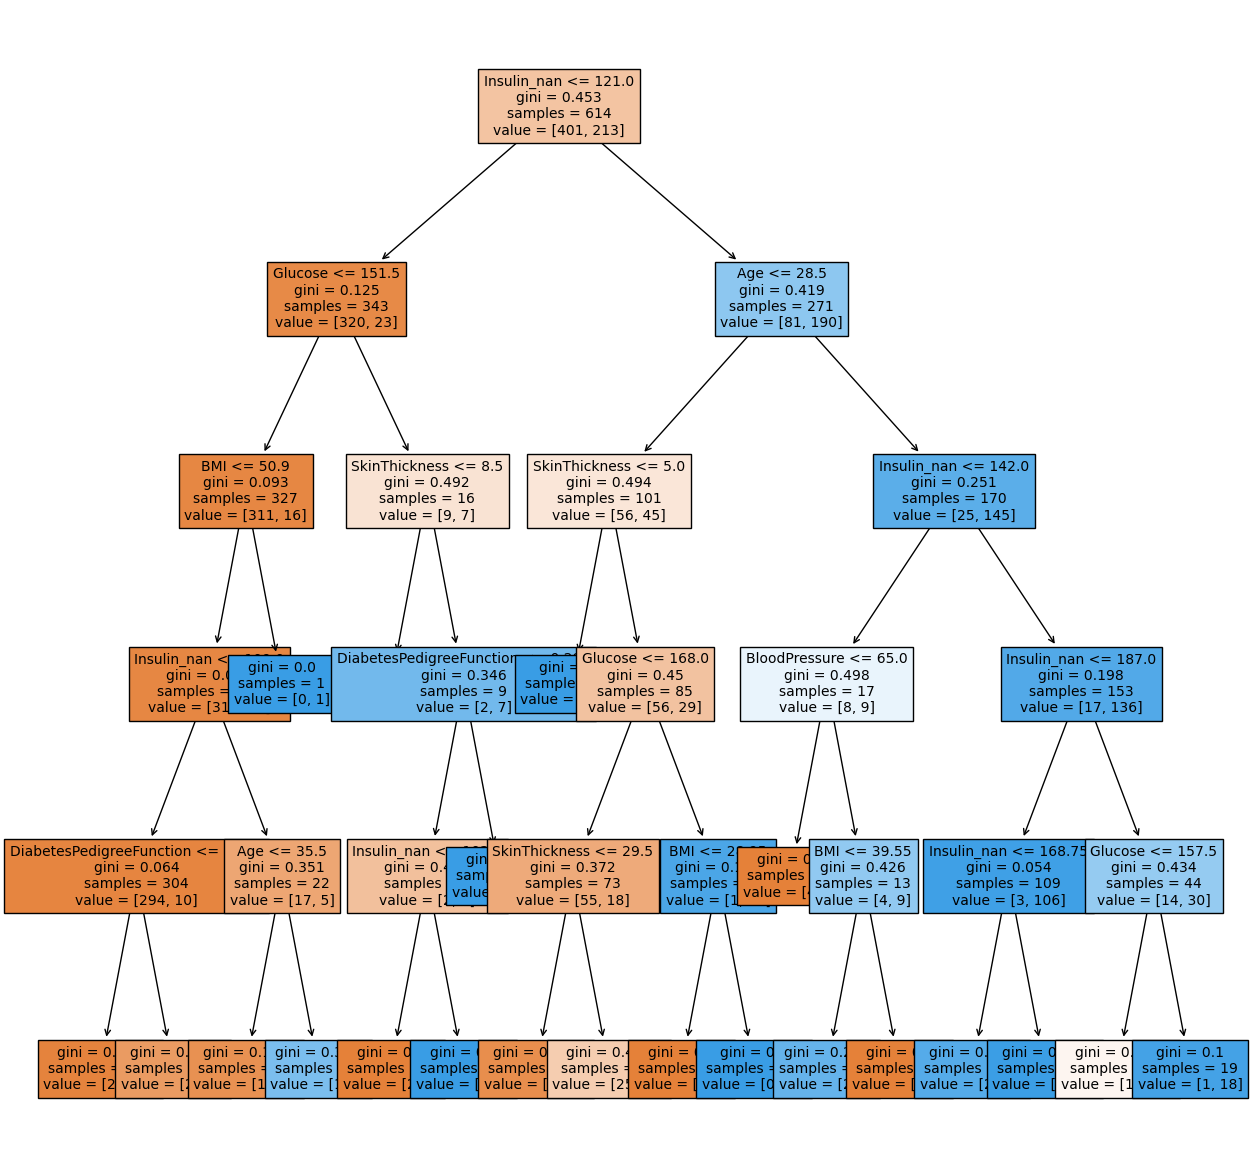

In [53]:
from sklearn.tree import plot_tree
# plot_tree(model) # 문자로 나오게 된다.
plt.figure(figsize=(15,15))
tree=plot_tree(model, feature_names = feature_names, fontsize=10, filled=True)

In [54]:
# 예측하고 결과를 y_predict
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

# 8 accuracy 측정하기

In [121]:
# 다르게 예측한 갯수를 구해서 diff_count에 할당
y_predict - y_test
abs(y_predict - y_test).sum()
# random _state 지정을 안해줘서 계속 랜덤 -> decisiontree 에도 적용

28

In [122]:
# accuracy score구한다

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

81.81818181818183